In [1]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from tqdm import tqdm
import types
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load the dataset
filename = "NF-UQ-NIDS3.csv"
df = pd.read_csv(filename)

# Convert IP addresses to integer values
df['IPV4_SRC_ADDR'] = df['IPV4_SRC_ADDR'].apply(lambda x: int(''.join([bin(int(i)+256)[3:] for i in x.split('.')]), 2))
df['IPV4_DST_ADDR'] = df['IPV4_DST_ADDR'].apply(lambda x: int(''.join([bin(int(i)+256)[3:] for i in x.split('.')]), 2))

# Drop the 'Dataset' column
df = df.drop(columns=['Dataset'])

# Separate the features and the target
X = df.drop(columns=['Attack'])
y = df['Attack']

# Preprocess the target
le = LabelEncoder()
y = le.fit_transform(y)

# Standardize the features
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Define base learners
base_learners = [
                 ('rf_1', RandomForestClassifier(n_jobs=-1)),
                 ('rf_2', AdaBoostClassifier()),
                 ('rf_3', GradientBoostingClassifier())
                ]

# Initialize Stacking Classifier with the Meta Learner
clf = StackingClassifier(estimators=base_learners, final_estimator=LogisticRegression(max_iter=10), n_jobs=-1)

# Define the parameters for the GridSearchCV
param_grid = {
    'rf_1__n_estimators': [10, 50, 100],
    'rf_1__random_state': [42, 1],
    'rf_2__n_estimators': [10, 50, 100],
    'rf_2__random_state': [42, 1],
    'rf_3__n_estimators': [10, 50, 100],
    'rf_3__random_state': [42, 1]
}

# Initialize the GridSearchCV
grid = GridSearchCV(clf, param_grid, cv=3, n_jobs=-1)

# Fit the GridSearchCV
grid.fit(X_train, y_train)

# Print the best parameters
print(grid.best_params_)

# Make predictions using the best model and evaluate the accuracy
y_pred = grid.predict(X_test)
print("Stacking Classifier Accuracy: ", accuracy_score(y_test, y_pred))


/home/redparrot/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/redparrot/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

{'rf_1__n_estimators': 100, 'rf_1__random_state': 42, 'rf_2__n_estimators': 10, 'rf_2__random_state': 42, 'rf_3__n_estimators': 10, 'rf_3__random_state': 42}
Stacking Classifier Accuracy:  0.8387938793879388


In [17]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from tqdm import tqdm
import types

# Load the dataset
filename = "NF-UQ-NIDS3.csv"
df = pd.read_csv(filename)

# Convert IP addresses to integer values
df['IPV4_SRC_ADDR'] = df['IPV4_SRC_ADDR'].apply(lambda x: int(''.join([bin(int(i)+256)[3:] for i in x.split('.')]), 2))
df['IPV4_DST_ADDR'] = df['IPV4_DST_ADDR'].apply(lambda x: int(''.join([bin(int(i)+256)[3:] for i in x.split('.')]), 2))

# Drop the 'Dataset' column
df = df.drop(columns=['Dataset'])

# Separate the features and the target
X = df.drop(columns=['Attack'])
y = df['Attack']

# Preprocess the target
le = LabelEncoder()
y = le.fit_transform(y)

# Standardize the features
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Define base learners
base_learners = [
                 ('rf_1', RandomForestClassifier(n_estimators=100, random_state=42)),
                 ('rf_2', AdaBoostClassifier(n_estimators=10, random_state=42)),
                 ('rf_3', GradientBoostingClassifier(n_estimators=10, random_state=42)),
                ]

# Initialize Stacking Classifier with the Meta Learner
clf = StackingClassifier(estimators=base_learners, final_estimator=LogisticRegression(max_iter=10000), n_jobs=-1)

# Train the Stacking Classifier
clf.fit(X_train, y_train)

# Make predictions and evaluate the accuracy
y_pred = clf.predict(X_test)
print("Stacking Classifier Accuracy: ", accuracy_score(y_test, y_pred))


Stacking Classifier Accuracy:  0.8347434743474348


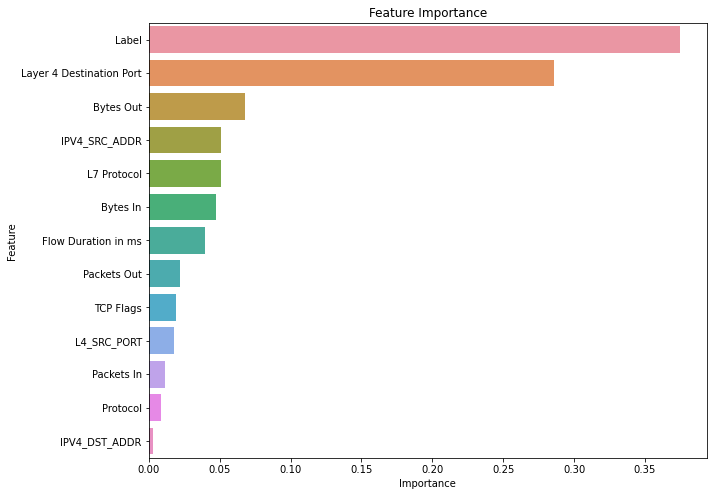

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances from each base learner
rf_importance = clf.named_estimators_['rf_1'].feature_importances_
ada_importance = clf.named_estimators_['rf_2'].feature_importances_
gb_importance = clf.named_estimators_['rf_3'].feature_importances_

# Average feature importances
avg_importance = (rf_importance + ada_importance + gb_importance) / 3

# Get feature names
feature_names = X.columns

# Create a pandas dataframe with feature importances
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': avg_importance
})

# Sort by importance
importance_df = importance_df.sort_values('Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10,8))
sns.barplot(data=importance_df, x='Importance', y='Feature')
plt.title('Feature Importance')
plt.show()


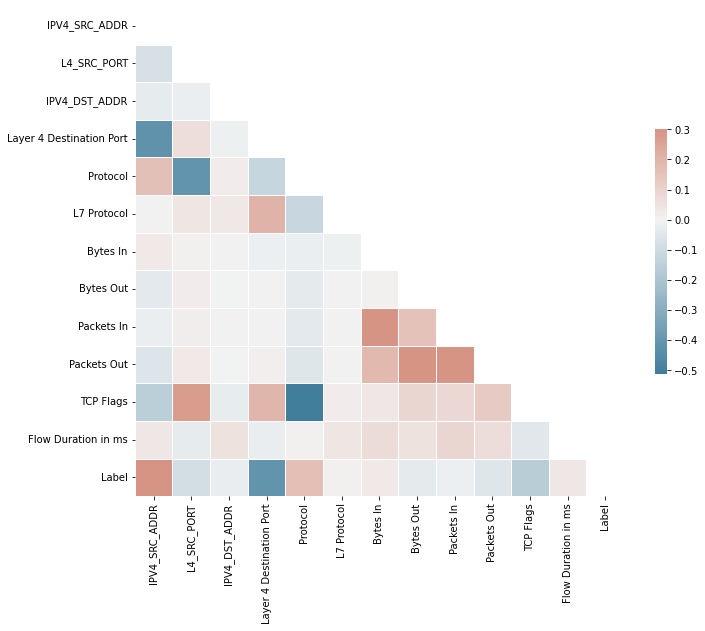

In [5]:
# Compute the correlation matrix
corr = X.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

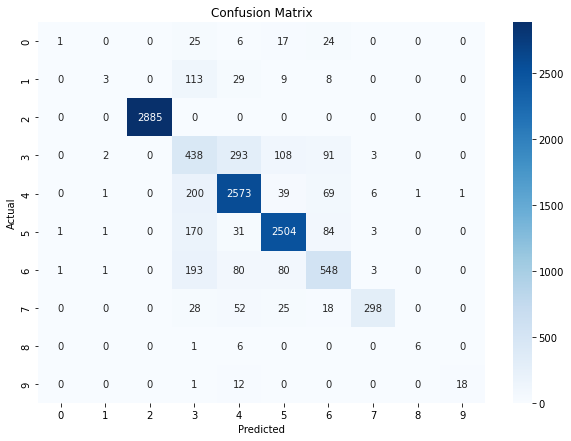

In [9]:
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Generate a heatmap from the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [13]:
from sklearn.metrics import classification_report

# Initialize the base models
clf_rf = RandomForestClassifier(n_estimators=100, random_state=42)
clf_ada = AdaBoostClassifier(n_estimators=10, random_state=42)
clf_gb = GradientBoostingClassifier(n_estimators=10, random_state=42)

# List of classifiers
classifiers = [clf_rf, clf_ada, clf_gb]

# List of classifier names
names = ['Random Forest', 'AdaBoost', 'GradientBoost']

for clf, name in zip(classifiers, names):
    # Train the classifier
    clf.fit(X_train, y_train)

    # Make predictions
    y_pred = clf.predict(X_test)
    
    # Print classification report
    print(f"Classification Report for {name}:")
    print(classification_report(y_test, y_pred))


Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        73
           1       0.66      0.12      0.20       162
           2       1.00      1.00      1.00      2885
           3       0.35      0.41      0.38       935
           4       0.84      0.90      0.87      2890
           5       0.91      0.90      0.90      2794
           6       0.63      0.61      0.62       906
           7       0.94      0.71      0.81       421
           8       0.88      0.54      0.67        13
           9       1.00      0.45      0.62        31

    accuracy                           0.83     11110
   macro avg       0.72      0.56      0.61     11110
weighted avg       0.84      0.83      0.83     11110

Classification Report for AdaBoost:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        73
           1       0.00      0.00      0.00       162
 

/home/redparrot/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/redparrot/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/redparrot/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report for GradientBoost:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        73
           1       0.00      0.00      0.00       162
           2       1.00      1.00      1.00      2885
           3       0.26      0.37      0.30       935
           4       0.69      0.89      0.78      2890
           5       0.89      0.87      0.88      2794
           6       0.85      0.16      0.27       906
           7       1.00      0.69      0.82       421
           8       1.00      0.38      0.56        13
           9       0.85      0.55      0.67        31

    accuracy                           0.78     11110
   macro avg       0.65      0.49      0.53     11110
weighted avg       0.80      0.78      0.76     11110



/home/redparrot/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/redparrot/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/redparrot/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [15]:
# Make predictions with the stacked model
y_pred_stacked = clf.predict(X_test)

# Print the classification report
print("Classification Report for Stacked Model:")
print(classification_report(y_test, y_pred_stacked, zero_division=1))


Classification Report for Stacked Model:
              precision    recall  f1-score   support

           0       1.00      0.00      0.00        73
           1       0.00      0.00      1.00       162
           2       1.00      1.00      1.00      2885
           3       0.26      0.37      0.30       935
           4       0.69      0.89      0.78      2890
           5       0.89      0.87      0.88      2794
           6       0.85      0.16      0.27       906
           7       1.00      0.69      0.82       421
           8       1.00      0.38      0.56        13
           9       0.85      0.55      0.67        31

    accuracy                           0.78     11110
   macro avg       0.75      0.49      0.63     11110
weighted avg       0.80      0.78      0.78     11110

